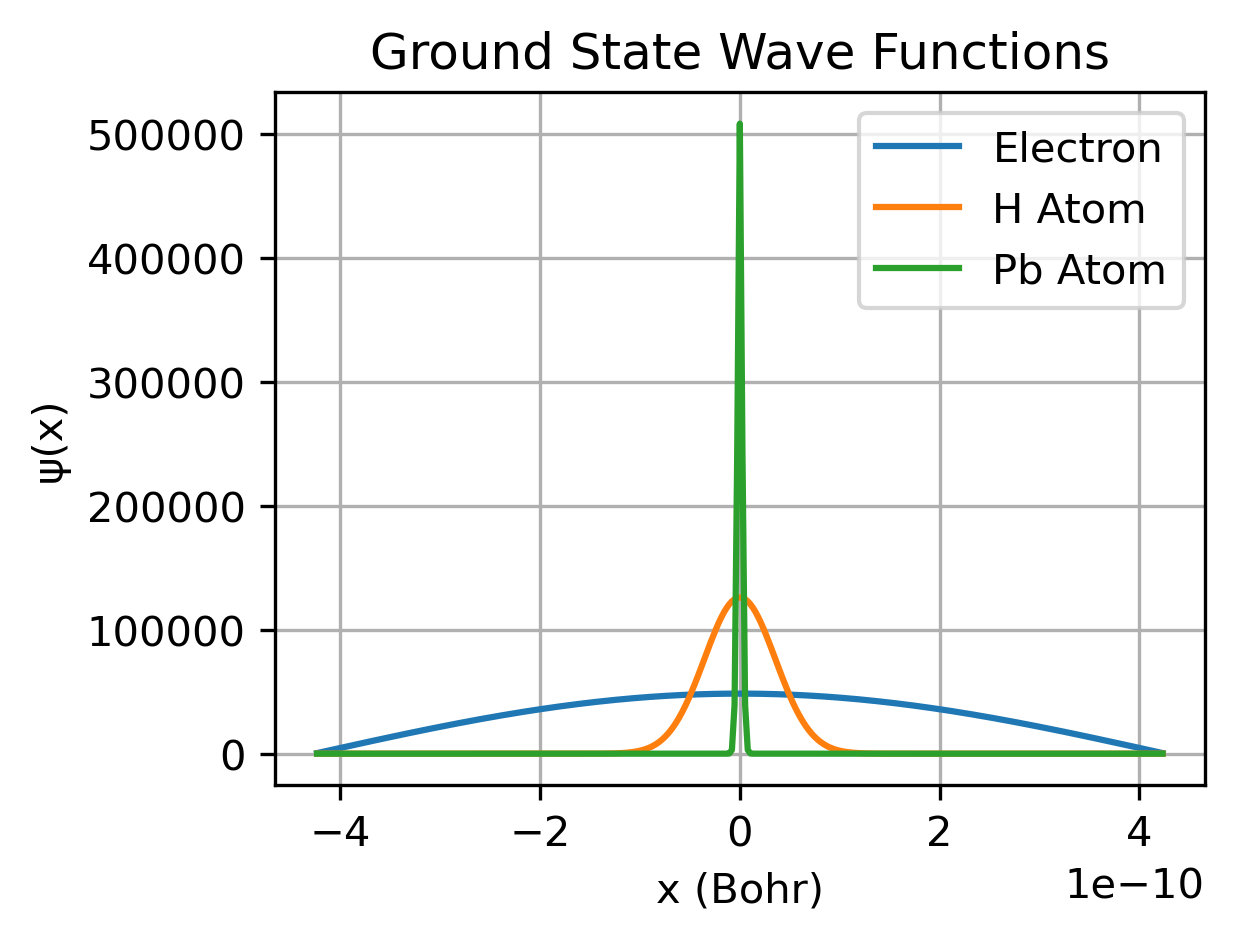

In [40]:
# Author: Junfei Ding, Guizhou University, Date: 2024-6-25
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as const
from scipy.constants import hbar, m_e

def qrdecompose(A):
    """
    Perform QR decomposition of matrix A 
    using Gram-Schmidt process.
    Parameters:
    A (numpy.ndarray): The input matrix.

    Returns:
    Q (numpy.ndarray): Orthogonal matrix.
    R (numpy.ndarray): Upper triangular matrix.
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

def qr_algorithm(A, num_iter=1000, tol=1e-5):
    """
    Use the QR algorithm to compute the eigenvalues of matrix A
    :param A: The matrix for which to compute the eigenvalues
    :param num_iter: The maximum number of iterations
    :param tol: Tolerance to determine convergence
    :return: Eigenvalues
    """
    n = A.shape[0]
    Ak = np.copy(A)
    
    for _ in range(num_iter):
        Q, R = qrdecompose(Ak)  # Perform QR decomposition
        Ak = np.dot(R, Q)  # Update Ak by multiplying R and Q
        
        # Check if the off-diagonal elements are close to zero
        off_diagonal = Ak - np.diag(np.diagonal(Ak))
        if np.all(np.abs(off_diagonal) < tol):
            break
    return np.diagonal(Ak)

def inverse_iteration(A, mu, num_iter=1000, tol=1e-10):
    """
    Use the inverse iteration method to compute the eigenvalue 
    and eigenvector of matrix A closest to the given value mu.
    
    :param A: The matrix for which to compute the eigenvalue and eigenvector
    :param mu: The value closest to the desired eigenvalue
    :param num_iter: The maximum number of iterations
    :param tol: Tolerance to determine convergence
    :return: Eigenvalue, Eigenvector
    """
    n = A.shape[0]
    I = np.eye(n)
    B = A - mu * I
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)
    
    for _ in range(num_iter):
        y = np.linalg.solve(B, x)
        x_new = y / np.linalg.norm(y)
        if np.linalg.norm(x - x_new) < tol:
            break
        x = x_new
    
    eigenvalue = np.dot(x.T, np.dot(A, x))
    return eigenvalue, x


# Constructing the Hamiltonian
def Hamilt(m, V):
    mu = -1 * hbar**2 / (2 * m * dx**2)
    # Initialize the H matrix
    H = np.zeros((x.size, x.size))
    # Fill the main diagonal: v - 2*mu
    np.fill_diagonal(H, V - 2 * mu)
    # Fill the upper diagonal: mu
    np.fill_diagonal(H[1:], mu)
    # Fill the lower diagonal: mu
    np.fill_diagonal(H[:, 1:], mu)
    return H

# Bohr in meters
bohr = const['Bohr radius'][0]

x = 8 * bohr
dx = 5e-2 * bohr
x = np.arange(-x, x + dx, dx)
omega = 5.0e13

# Pb atom mass
m_Pb = 207 * const['proton mass'][0]
# H atom mass
m_H = 1 * const['proton mass'][0]

# Potential
V_e = 0.5 * m_e * omega ** 2 * x**2
V_Pb = 0.5 * m_Pb * omega ** 2 * x**2
V_H = 0.5 * m_H * omega ** 2 * x**2



# Solve for eigenvalues and eigenvectors using inverse iteration method
mu_initial = 0  # Initial guess for eigenvalue
E_e, psi_e = inverse_iteration(Hamilt(m_e, V_e), mu_initial)
E_H, psi_H = inverse_iteration(Hamilt(m_H, V_H), mu_initial)
E_Pb, psi_Pb = inverse_iteration(Hamilt(m_Pb, V_Pb), mu_initial)

# Normalize the ground state wave functions
psi_e /= np.sqrt(np.sum(np.abs(psi_e)**2) * dx)
psi_Pb /= np.sqrt(np.sum(np.abs(psi_Pb)**2) * dx)
psi_H /= np.sqrt(np.sum(np.abs(psi_H)**2) * dx)

# Plot the ground state wave functions
plt.figure(figsize=(4, 3), dpi=300)
plt.plot(x, psi_e, label='Electron')
plt.plot(x, psi_H, label='H Atom')
plt.plot(x, psi_Pb, label='Pb Atom')
plt.xlabel('x (Bohr)')
plt.ylabel('ψ(x)')
plt.title('Ground State Wave Functions')
plt.grid(True)
plt.legend()
plt.show()


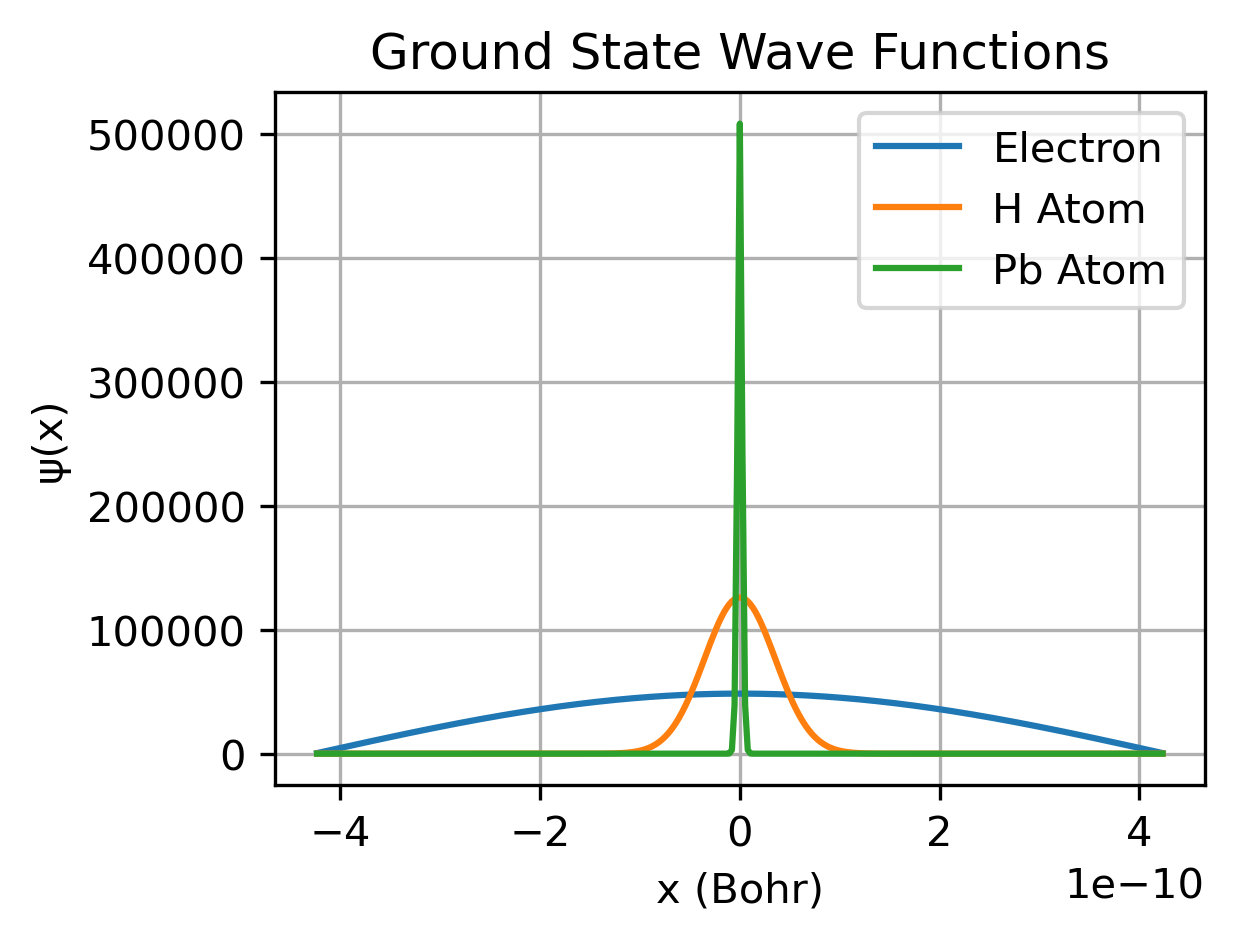

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as const
from scipy.constants import hbar, m_e
from scipy.linalg import eigh
# Bohr in meters
bohr=const['Bohr radius'][0]

x = 8 * bohr
dx = 5e-2 * bohr
x = np.arange(-x, x+dx, dx)
omega = 5.0e13

#Pb atom mass
m_Pb = 207 * const['proton mass'][0]
#H atom mass
m_H=1 * const['proton mass'][0]

#potential
V_e = 0.5 * m_e * omega ** 2 * x**2
V_Pb = 0.5 * m_Pb * omega ** 2 * x**2
V_H=0.5*m_H * omega ** 2 * x**2

# Constructing the Hamiltonian
def Hamilt(m,V):
    mu=-1*hbar**2/(2*m*dx**2)
    # Initialize the H matrix
    H = np.zeros((x.size, x.size))
    # Fill the main diagonal: v - 2*mu
    np.fill_diagonal(H, V - 2 * mu)
    # Fill the upper diagonal: mu
    np.fill_diagonal(H[1:], mu)
    # Fill the lower diagonal: mu
    np.fill_diagonal(H[:, 1:], mu)
    return H

E_e, psi_e = eigh(Hamilt(m_e, V_e))
E_H, psi_H = eigh(Hamilt(m_H, V_H))
E_Pb, psi_Pb = eigh(Hamilt(m_Pb, V_Pb))

psi_e[:, 0] /= np.sqrt(np.sum(np.abs(psi_e[:, 0])**2) * dx)
psi_Pb[:, 0] /= np.sqrt(np.sum(np.abs(psi_Pb[:, 0])**2) * dx )
psi_H[:,0] /=  np.sqrt(np.sum(np.abs(psi_H[:, 0])**2) * dx)



plt.figure(figsize=(4,3), dpi=300)
plt.plot(x, psi_e[:, 0], label='Electron')
plt.plot(x, psi_H[:, 0], label='H Atom')
plt.plot(x, psi_Pb[:, 0], label='Pb Atom')
plt.xlabel('x (Bohr)')
plt.ylabel('ψ(x)')
plt.title('Ground State Wave Functions')
# plt.xlim(-6*bohr,6*bohr)
# plt.ylim(0,6.0e5)
plt.grid(True)
plt.legend()
plt.show()


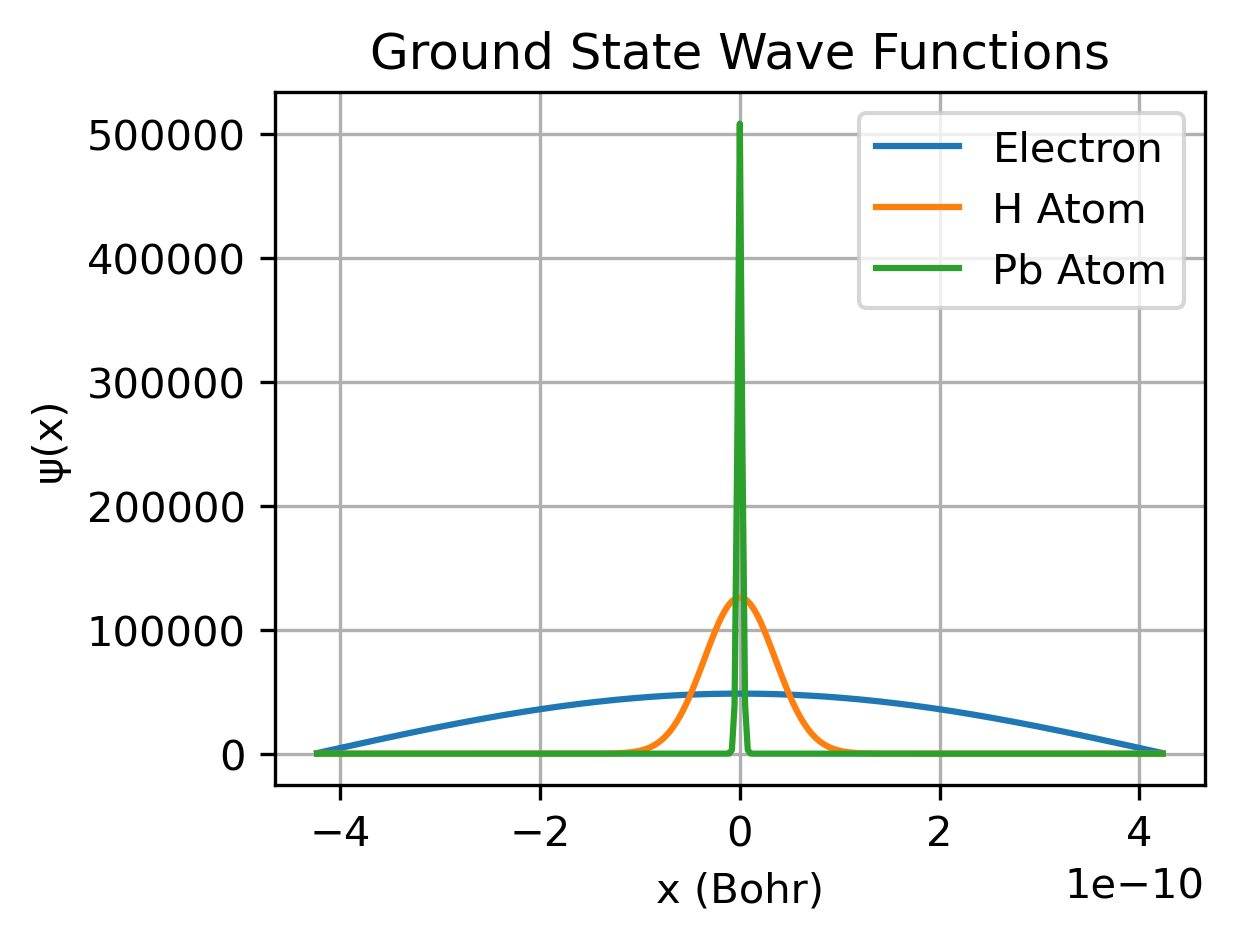

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar, m_e, physical_constants
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Bohr
bohr = 5.29177e-11 # in meters
x = 8 * bohr
dx = 5e-2 * bohr
x = np.arange(-x, x+dx, dx)
omega = 5.0e13

#Pb atom
m_Pb = 207 * physical_constants['proton mass'][0]
m_H=1 * physical_constants['proton mass'][0]


#potential
V_e = 0.5 * m_e * omega ** 2 * x**2
V_Pb = 0.5 * m_Pb * omega ** 2 * x**2
V_H=0.5*m_H * omega ** 2 * x**2

# Constructing the Hamiltonian
def Hamilt(m,V):
    mu=-1*hbar**2/(2*m*dx**2)
    H_diag=np.diag(V+(-2)*mu*np.ones_like(x))
    H_diag_up=H_diag+np.diag(mu*np.ones_like(x[:-1]), k=1)
    H_diag_up_down=H_diag_up+np.diag(mu*np.ones_like(x[:-1]), k=-1)
    #Change the last element's value of the first low to be mu
    # H_diag_up_down[0][-1]=mu
    # #Change the last element's value of the first column to be mu
    # H_diag_up_down[-1][0]=mu
    
    return H_diag_up_down

E_e, psi_e = eigh(Hamilt(m_e, V_e))
E_H, psi_H = eigh(Hamilt(m_H, V_H))
E_Pb, psi_Pb = eigh(Hamilt(m_Pb, V_Pb))

psi_e[:, 0] /= np.sqrt(np.sum(np.abs(psi_e[:, 0])**2) * dx)
psi_Pb[:, 0] /= np.sqrt(np.sum(np.abs(psi_Pb[:, 0])**2) * dx )
psi_H[:,0] /=  np.sqrt(np.sum(np.abs(psi_H[:, 0])**2) * dx)

plt.figure(figsize=(4,3), dpi=300)
plt.plot(x, psi_e[:, 0], label='Electron')
plt.plot(x, psi_H[:, 0], label='H Atom')
plt.plot(x, psi_Pb[:, 0], label='Pb Atom')
plt.xlabel('x (Bohr)')
plt.ylabel('ψ(x)')
plt.title('Ground State Wave Functions')
# plt.xlim(-6*bohr,6*bohr)
# plt.ylim(0,6.0e5)
plt.grid(True)
plt.legend()
plt.show()


In [1]:
numbers = [i for i in range(4)]
print("The generated list is:", numbers)

The generated list is: [0, 1, 2, 3]
